# Opgave 9.1
Bestem mindste kvadraters løsninger i python ved hjælp af $Q R$-dekomponering beregnet via forbedret Gram-Schmidt til de følgende problemer:

(a) Find et anden grads polynomium $y=a x^2+b x+c$ tæt ved datapunkterne
| $x$ | 0,0 | 1,9 | 3,1 | 6,2 | 7,1 |
|-----|-----|-----|-----|-----|-----|
| $y$ | 4,1 | 3,1 | 2,9 | 4,2 | 4,8 |

(b) Omskriv ligningen for en cirkel $(x-a)^2+(y-b)^2=r^2$ til formen $A x+B y+C=x^2+y^2$, med $A, B, C$ kun bestemt af $a, b$ og $r$. Brug denne omskrivning til at bestemme en cirkle tæt ved datapunkterne
| $x$ | -1,2 | -0,7 | -0,6 | -0,3 | 0,1 | 1,5 | 1,6 | 1,6 | 2,0 | 2,2 |
|-----|--------|--------|--------|--------|-----|-----|-----|-----|-----|-----|
| $y$ | 0,8    | -0,8 | -0,5 | 1,4    | -0,7 | -1,5 | -1,0 | 1,8   | -0,5 | 0,4 |


Giv gerne plots der illustrerer datapunkterne og den fundne løsning.

[[ 0.12005143]
 [-0.74196034]
 [ 4.08484497]]


Text(0, 0.5, '$y$')

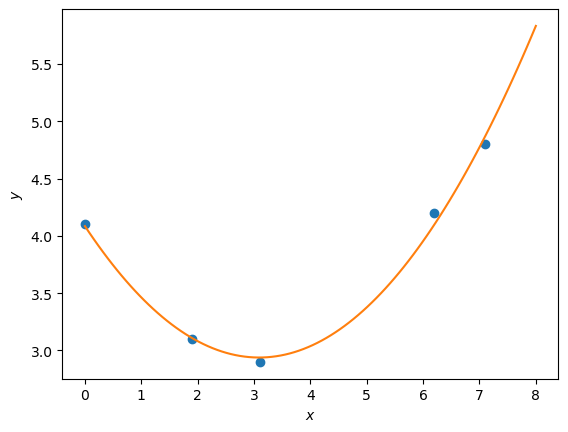

In [1]:
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[0.0,0.0,1.0],
             [1.9**2,1.9,1],
             [3.1**2,3.1,1],
             [6.2**2,6.2,1],
             [7.1**2,7.1,1]])

x = np.array(["a","b","c"])[:,np.newaxis]



def forbedret_gram_schmidt(a):
    _, k = a.shape 
    q = np.copy(a)
    r = np.zeros((k, k)) 
    for i in range(k): 
        r[i, i] = np.linalg.norm(q[:, i]) 
        q[:, i] /= r[i, i] 
        r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:] 
        q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:] 
    return q, r

b = np.array([4.1,3.1,2.9,4.2,4.8])[:,np.newaxis]

q,r = forbedret_gram_schmidt(A)

qTb = q.T@ b

def back_subs(r, c):
    _, n = r.shape 
    x = np.empty((n, 1)) 
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i] 
    return x 


koeffs = back_subs(r, qTb) 

print(koeffs)

cols = 3
x = np.array([0.0,1.9,3.1,6.2,7.1])
y = np.array([4.1,3.1,2.9,4.2,4.8])

t = np.linspace(0, 8, 100) 
fig, ax = plt.subplots() 
ax.plot(x, y, 'o') 
ax.plot(t, np.vander(t, cols) @ koeffs) 
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')

[2.08 1.13 0.61 2.05 0.5  4.5  3.56 5.8  4.25 5.  ]
[[1.32229726]
 [0.59741468]
 [2.16402058]]


Text(0, 0.5, '$y$')

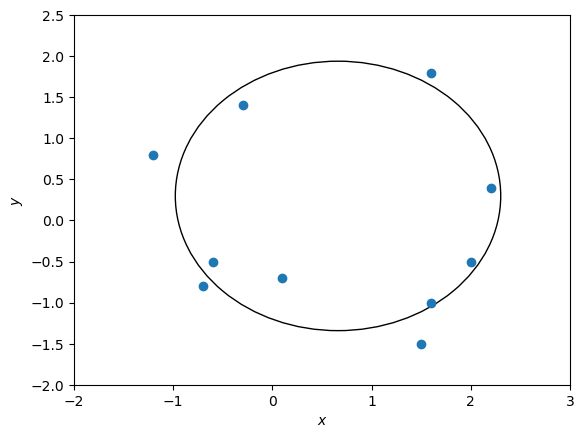

In [33]:
x = np.array([-1.2,-0.7,-0.6,-0.3,0.1,1.5,1.6,1.6,2.0,2.2])
y = np.array([0.8,-0.8,-0.5,1.4,-0.7,-1.5,-1.0,1.8,-0.5,0.4])
b = np.ones(10)

for i in range(0,10):
    b[i] = x[i]**2+y[i]**2

A = np.hstack([x[:,np.newaxis],y[:,np.newaxis],np.ones(10)[:,np.newaxis]])

def forbedret_gram_schmidt(a):
    _, k = a.shape 
    q = np.copy(a)
    r = np.zeros((k, k)) 
    for i in range(k): 
        r[i, i] = np.linalg.norm(q[:, i]) 
        q[:, i] /= r[i, i] 
        r[[i], i+1:] = q[:, [i]].T @ q[:, i+1:] 
        q[:, i+1:] -= q[:, [i]] @ r[[i], i+1:] 
    return q, r


q,r = forbedret_gram_schmidt(A)

qTb = q.T@ b[:,np.newaxis]
print(b)


def back_subs(r, c):
    _, n = r.shape 
    x = np.empty((n, 1)) 
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i] 
    return x 


koeffs = back_subs(r, qTb) 

print(koeffs)




tx = np.linspace(-2, 2, 100) 

fig, ax = plt.subplots() 
ax.plot(x, y, 'o') 
a = koeffs[0]/2
b = koeffs[1]/2
r = np.sqrt(koeffs[2]+a**2+b**2)
circle = plt.Circle(( a , b ), r, fill = False )
ax.add_patch(circle)
plt.ylim(-2,2.5)
plt.xlim(-2,3)
ax.set_xlabel('$x$') 
ax.set_ylabel('$y$')

# Opgave 9.2.
For de følgende samlinger $x$-værdier beregn konditionstallet for det tilsvarende Vandermonde matrix np. vander ( . .,4).

(a) $x_0=0.0, x_1=0.5, x_2=1.0, x_3=1.5, x_4=2.0$,

(b) $x_0=1.0, x_1=1.5, x_2=2.0, x_3=2.5, x_4=3.0$,

(c) $x_0=-1.0, x_1=-0.5, x_2=0.0, x_3=0.5, x_4=1.0$

(d) $x_0=-1.0, x_1=-0.4, x_2=0.0, x_3=0.4, x_4=1.0$

(e) $x_0=-1.0, x_1=-0.6, x_2=0.0, x_3=0.6, x_4=1.0$

Hvilke konklusioner kan du drage?

In [3]:
# (a) x-values
x_values_a = np.array([0.0, 0.5, 1.0, 1.5, 2.0])

aVander = np.vander(x_values_a,4)
u,s,v = np.linalg.svd(aVander)
kondital = s[0]/s[-1]
print("\n kondital for A:",kondital)

# (b) x-values
x_values_b = np.array([1.0, 1.5, 2.0, 2.5, 3.0])

bVander = np.vander(x_values_b,4)
u,s,v = np.linalg.svd(bVander)
kondital = s[0]/s[-1]
print("\n kondital for B:",kondital)

# (c) x-values
x_values_c = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])

cVander = np.vander(x_values_c,4)
u,s,v = np.linalg.svd(cVander)
kondital = s[0]/s[-1]
print("\n kondital for C:",kondital)

# (d) x-values
x_values_d = np.array([-1.0, -0.4, 0.0, 0.4, 1.0])

dVander = np.vander(x_values_d,4)
u,s,v = np.linalg.svd(dVander)
kondital = s[0]/s[-1]
print("\n kondital for D:",kondital)

# (e) x-values
x_values_e = np.array([-1.0, -0.6, 0.0, 0.6, 1.0])

eVander = np.vander(x_values_e,4)
u,s,v = np.linalg.svd(eVander)
kondital = s[0]/s[-1]
print("\n kondital for E:",kondital)


 kondital for A: 86.33187753066093

 kondital for B: 1058.2220755143067

 kondital for C: 7.103855898839079

 kondital for D: 7.65839308368757

 kondital for E: 7.283574631314218


## Opgave 9.3.

For de følgende matricer $A$ 
        
        (i) bestem en minimal samling søjler der udspænder søjlerummet S(A) 
    
        (ii) brug SVD til at angive en ortonormal basis for S(A).

(a) $A=\left[\begin{array}{lll}1 & 0 & 1 \\ 0 & 5 & 2\end{array}\right]$,

Det er 2



(b) $A=\left[\begin{array}{ll}5 & 0 \\ 0 & 1 \\ 3 & 2\end{array}\right]$.
Det er 2

In [4]:
import numpy as np

# a)
A = np.array([[1,0,1],[0,5,2]])
u,s,vt = np.linalg.svd(A, full_matrices = False)
print("opgave a\n",u)

# b)
A = np.array([[5,0],[0,1],[3,2]])
u,s,vt = np.linalg.svd(A,full_matrices = False)
print("opgave b\n",u)


opgave a
 [[ 0.07347291  0.99729721]
 [ 0.99729721 -0.07347291]]
opgave b
 [[-0.8266759   0.49944247]
 [-0.03285637 -0.50264481]
 [-0.56171827 -0.70562413]]


# Opgave 9.4

Lad $(x_i,y_i),i=0,\dots,k-1$, være nogle datapunkter i $\mathbb{R}^2$. Ved at bruge normalligninger vis

(a) at den mindste kvadraters løsning for det konstante funktion $f(x)=c$ er givet ved $c=\bar{y}$, middelværdien for $y_0, \ldots, y_{k-1}$,

(b) at den mindste kvadraters løsning for det lineære funktion $f(x)=a x+b$ er givet ved
$$
a=\frac{k\langle x, y\rangle-s_x s_y}{k\|x\|_2^2-s_x^2} \quad \text { og } \quad b=\frac{\|x\|_2^2 s_y-s_x\langle x, y\rangle}{k\|x\|_2^2-s_x^2}
$$
hvor $s_x=\sum_{i=0}^{k-1} x_i$ og $s_y=\sum_{i=0}^{k-1} y_i$.
[Opgaven kunne godt gennemføres med Gram-Schmidt metoden, som er oftest til at foretrække over normalligninger, men matematisk giver begge det samme resultat.]

##  a)
Vi har at normalligningen er på formen:
$$
A^TAx = A^Tb
$$
I vores tilfælde har vi at A er en søjlevektor bestående af 1'ere og b er alle y værdierne. Derved bliver denne ligning:
$$
\begin{bmatrix}
1 & 1 & ... & 1
\end{bmatrix}
\begin{bmatrix}
1\\
1\\
.\\
.\\
.\\
1
\end{bmatrix}
\begin{bmatrix}
C
\end{bmatrix}
=
\begin{bmatrix}
1 & 1 & ... & 1
\end{bmatrix}
\begin{bmatrix}
y_1\\
y_2\\
.\\
.\\
.\\
y_n\\
\end{bmatrix}
$$
Dette giver os:
$$
\begin{align}
nc = \sum_{i=0}^{n}b_i\\
c = \frac{\sum_{i=0}^{n}b_i}{n} = \bar y
\end{align}
$$


## b)
Benytter os af det samme ender med:
$$
\begin{bmatrix}
x_0 & x_1 & ... & x_n\\
1 & 1 & ... & 1
\end{bmatrix}
\begin{bmatrix}
x_0 & 1\\
x_1 & 1\\
... & ...\\
x_n & 1\\
\end{bmatrix}
=
\begin{bmatrix}
x_0 & x_1 & ... & x_n\\
1 & 1 & ... & 1
\end{bmatrix}
\begin{bmatrix}
y_0\\
y_1\\
...\\
y_n
\end{bmatrix}
$$
Dette giver os:
$$
\begin{bmatrix}
\Sigma_{i=0}^{n-1}ax_{i}^{2}+bx_i\\
\Sigma_{i=0}^{n-1}y_i
\end{bmatrix}
=
\begin{bmatrix}
\Sigma_{i=0}^{n-1}x_i y_i\\
\Sigma_{i=0}^{n-1}b+ax_i
\end{bmatrix}
$$


# Opgave 9.5
For $A \in \mathbb{R}^{m \times n}$ med reduceret SVD $A=U \Sigma V^T$, lad $A^{+}=V \Sigma^{-1} U^T \in$ $\mathbb{R}^{n \times m}$ være dens pseudoinvers.

(a) Hvis $A$ er kvadratisk, $A \in \mathbb{R}^{n \times n}$, og invertibel, vis at $A^{+}=A^{-1}$.
$$
\begin{align}
U\Sigma V^{T}V\Sigma^{-1}U^{T}\\
U\Sigma I_n\Sigma^{-1}U^{T} \\
UI_{n}U^{T}\\
I_n
\end{align}
$$

(b) Vis generelt at

    (i) 
    $A A^{+} A=A$,
    $I_nA = A$

    (ii) 
    $A^{+} A A^{+}=A^{+}$,
    $I_n A^+ = A^{+}$

    (iii) 

    $\left(A A^{+}\right)^T=A A^{+}$
    $I_{n}^{T}=I_n$
    

    (iv) 
    $\left(A^{+} A\right)^T=A^{+} A$.
    $I_n^T=In$
